In [1]:
%pylab inline
import numpy as np
import pylab as plt

from sklearn import decomposition
from sklearn import datasets

from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


## Iris Dataset

In [29]:
iris = datasets.load_iris()
data_x = iris.data
data_y = iris.target

print('data_x:', data_x.shape)
print('data_y:', data_y.shape)
print('Labels:', np.unique(data_y))

data_x: (150, 4)
data_y: (150,)
Labels: [0 1 2]


## 2 Dimensional Decomposition

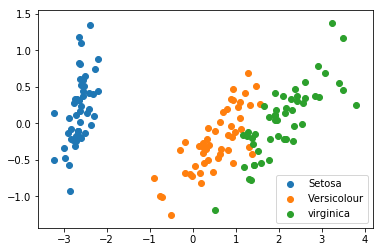

In [30]:
# PCA
pca = decomposition.PCA(n_components=2)
pca.fit(data_x)
transformed_x = pca.transform(data_x)


# Visualize
_itervals = [('Setosa', 0), ('Versicolour', 1), ('virginica', 2)]
for name, label in _itervals:
    sample_x = transformed_x[data_y == label]
    plt.scatter(sample_x[:, 0], sample_x[:, 1], label=name)
plt.legend()

## 3 Dimensional Decomposition

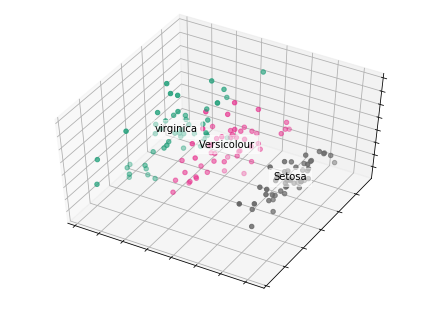

In [31]:
pca = decomposition.PCA(n_components=3)
pca.fit(data_x)
transformed_x = pca.transform(data_x)

# Visualize
fig = plt.figure(1)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=50, azim=120)

_itervals = [('Setosa', 0), ('Versicolour', 1), ('virginica', 2)]
for name, label in _itervals:
    ax.text3D(transformed_x[data_y==label, 0].mean(),
              transformed_x[data_y==label, 1].mean(), 
              transformed_x[data_y==label, 2].mean(), name, 
              horizontalalignment='center', 
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
colors = np.choose(data_y, [0, 1, 2]).astype(np.float)
ax.scatter(transformed_x[:, 0], transformed_x[:, 1], transformed_x[:, 2], cmap=plt.cm.Dark2_r, c=colors)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
print()